# An introduction to seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of `matplotlib <https://matplotlib.org/>`_ and integrates closely with `pandas <https://pandas.pydata.org/>`_ data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

Here's an example of what seaborn can do:

In [1]:
!pip install -q -r requirements.txt

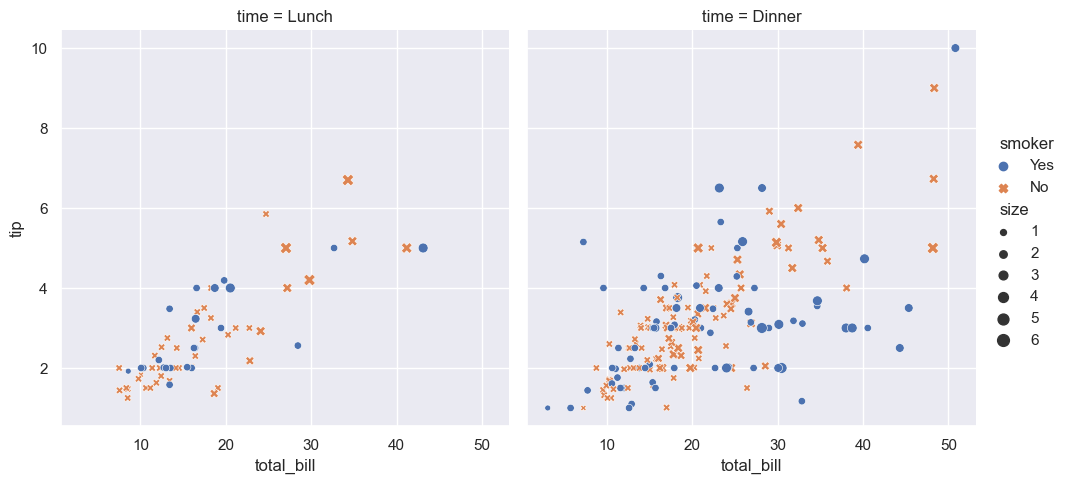

In [2]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
plt.show()

In [3]:
# Import seaborn
import seaborn as sns

In [4]:
# Apply the default theme
sns.set_theme()

In [5]:
# Load an example dataset
tips = sns.load_dataset("tips")

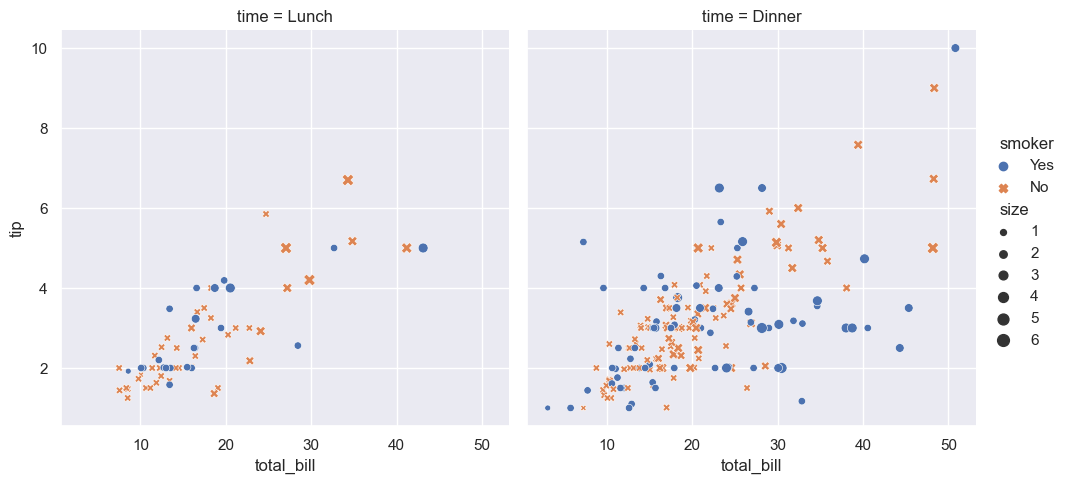

In [6]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
plt.show()

This plot shows the relationship between five variables in the tips dataset using a single call to the seaborn function :func:`relplot`. Notice how we provided only the names of the variables and their roles in the plot. Unlike when using matplotlib directly, it wasn't necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands. This declarative approach lets you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.


## A high-level API for statistical graphics

There is no universally best way to visualize data. Different questions are best answered by different plots. Seaborn makes it easy to switch between different visual representations by using a consistent dataset-oriented API.

The function :func:`relplot` is named that way because it is designed to visualize many different statistical *relationships*. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The :func:`relplot` function has a convenient ``kind`` parameter that lets you easily switch to this alternate representation:

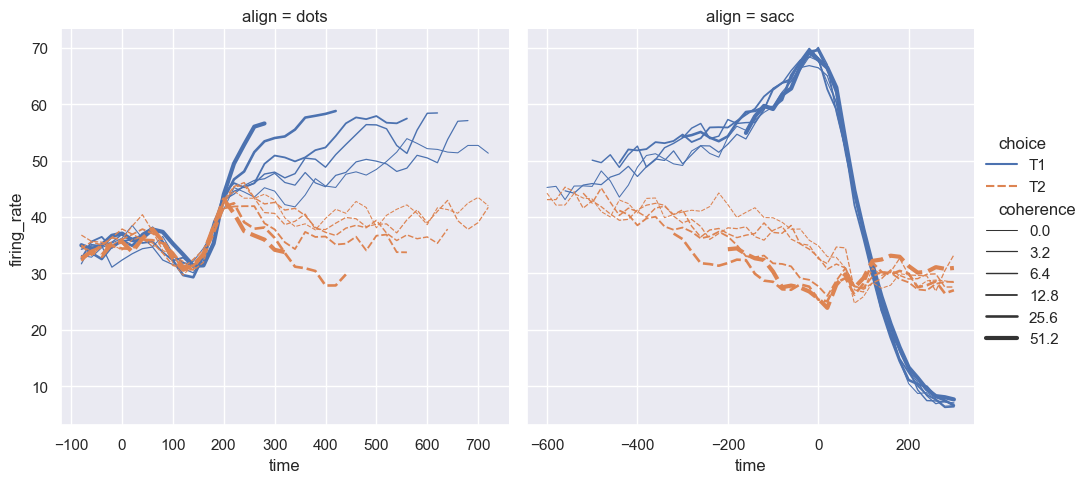

In [7]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)
plt.show()

Notice how the ``size`` and ``style`` parameters are used in both the scatter and line plots, but they affect the two visualizations differently: changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot. We did not need to keep those details in mind, letting us focus on the overall structure of the plot and the information we want it to convey.


## Statistical estimation

Often, we are interested in the *average* value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions:

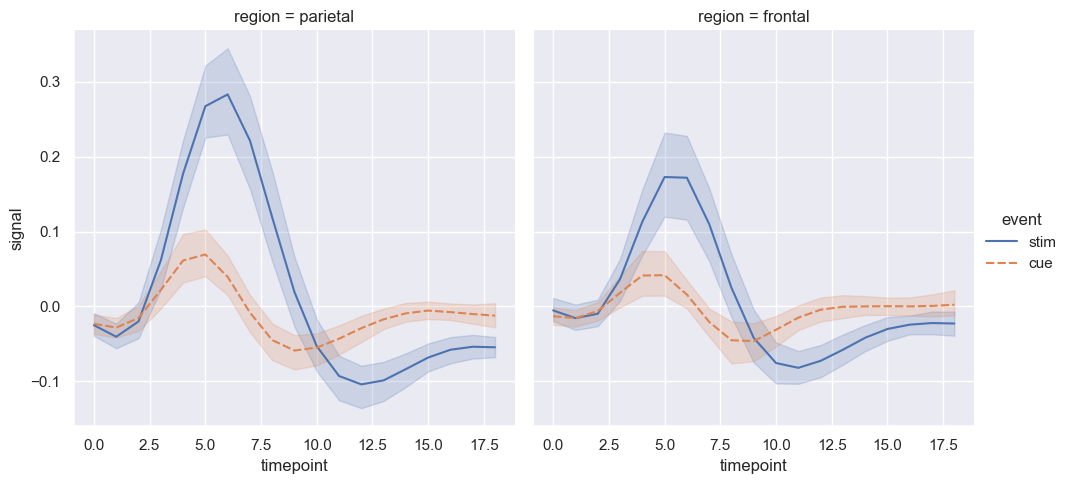

In [8]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)
plt.show()

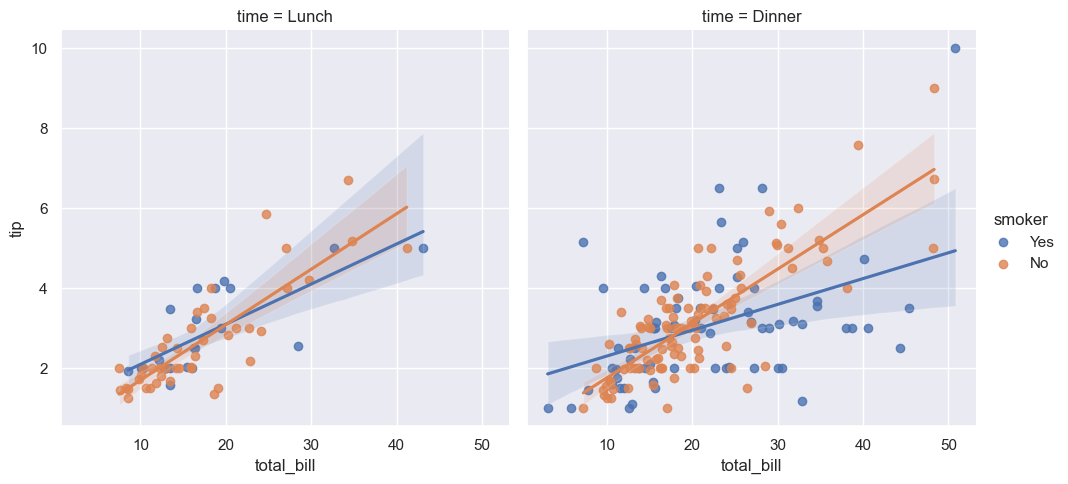

In [9]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
plt.show()

## Distributional representations

Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function :func:`displot` supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

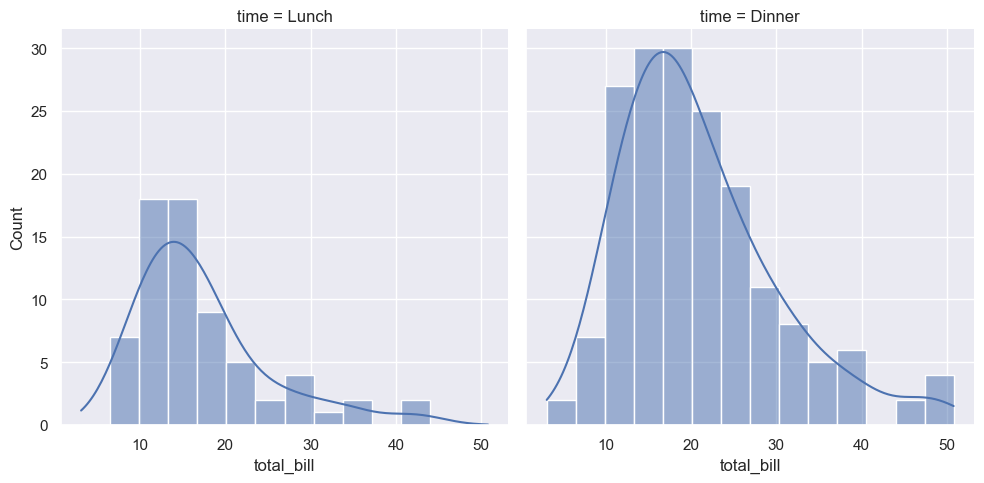

In [10]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)
plt.show()

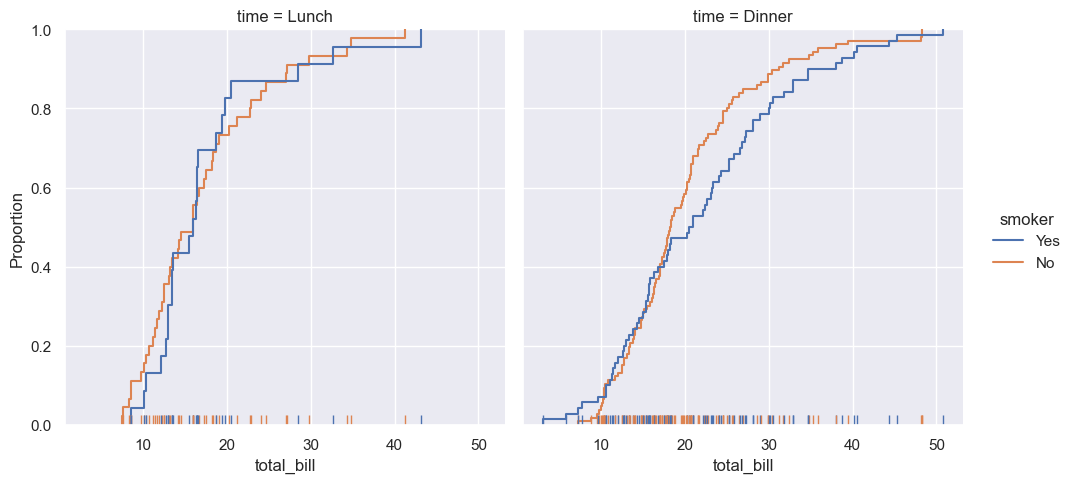

In [11]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)
plt.show()

## Plots for categorical data

Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through :func:`catplot`. These plots offer different levels of granularity. At the finest level, you may wish to see every observation by drawing a "swarm" plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they don't overlap:

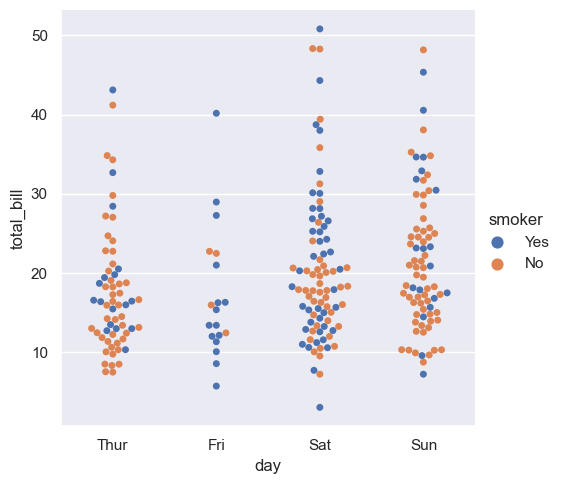

In [12]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")
plt.show()

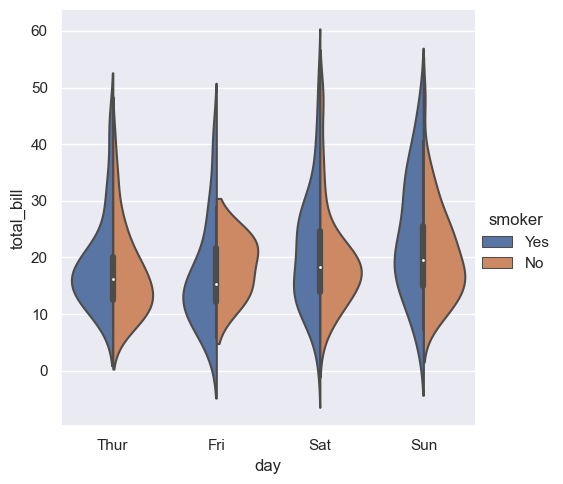

In [13]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
plt.show()

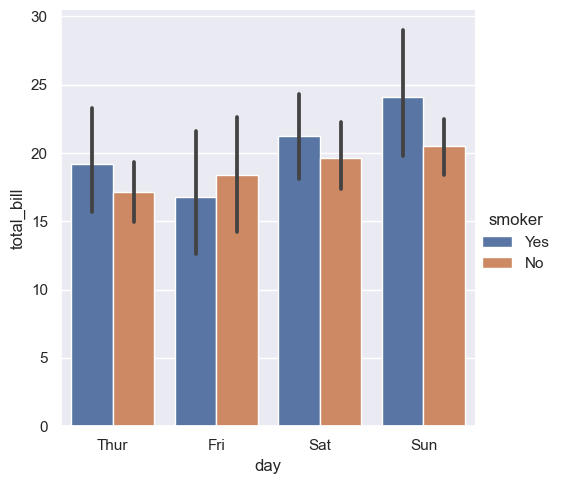

In [14]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")
plt.show()

## Multivariate views on complex datasets

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, :func:`jointplot`, focuses on a single relationship. It plots the joint distribution between two variables along with each variable's marginal distribution:

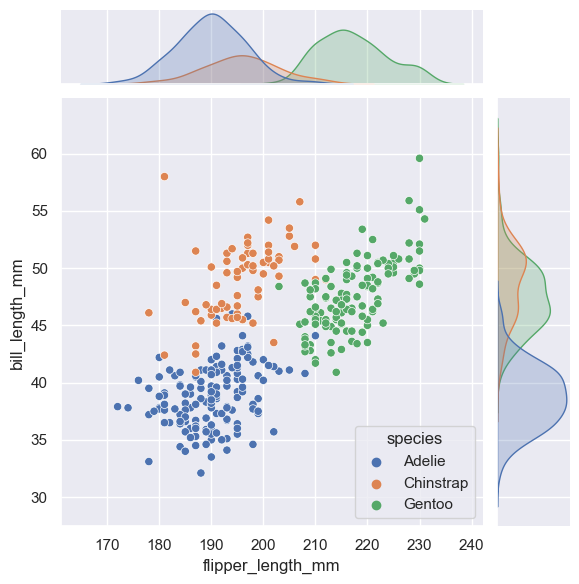

In [15]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

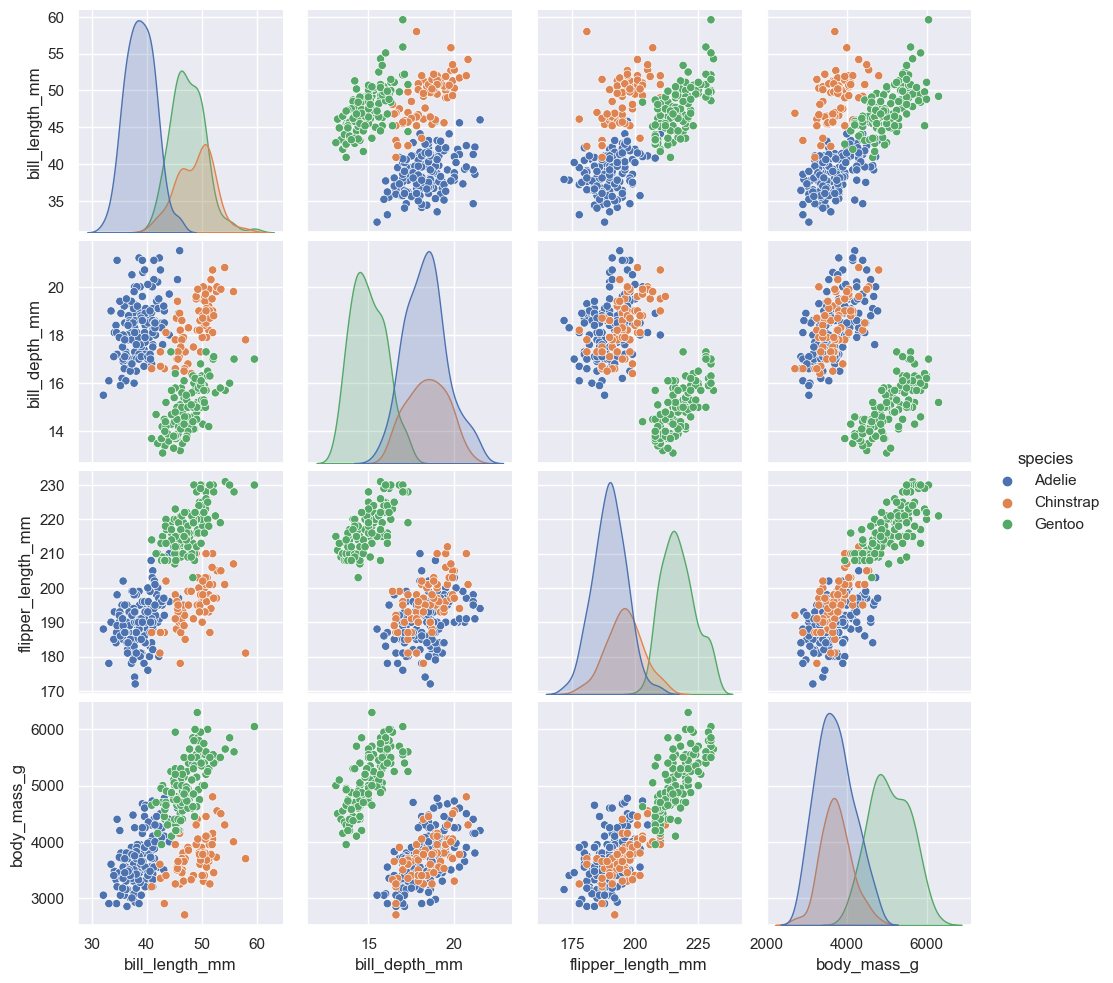

In [16]:
sns.pairplot(data=penguins, hue="species")
plt.show()

## Lower-level tools for building figures

These tools work by combining :doc:`axes-level </tutorial/function_overview>` plotting functions with objects that manage the layout of the figure, linking the structure of a dataset to a :doc:`grid of axes </tutorial/axis_grids>`. Both elements are part of the public API, and you can use them directly to create complex figures with only a few more lines of code:

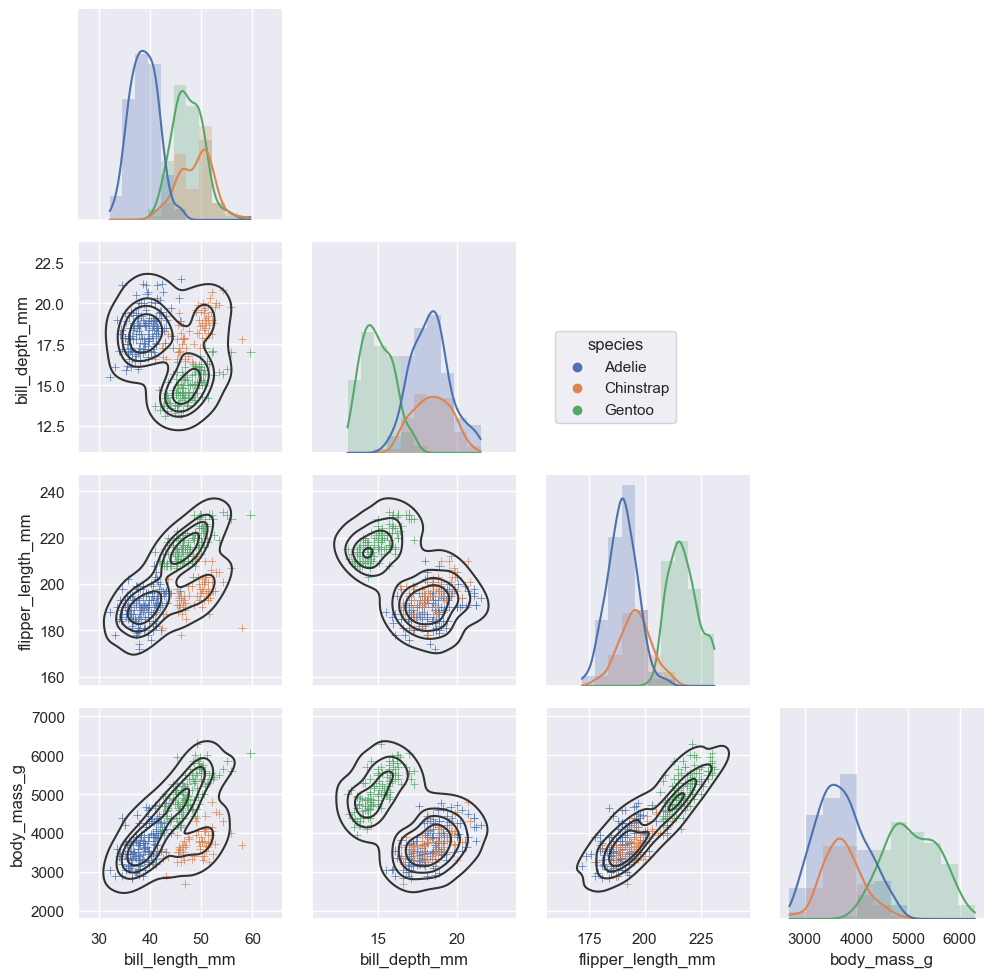

In [17]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))
plt.show()

## Opinionated defaults and flexible customization

Seaborn creates complete graphics with a single function call: when possible, its functions will automatically add informative axis labels and legends that explain the semantic mappings in the plot.

In many cases, seaborn will also choose default values for its parameters based on characteristics of the data. For example, the :doc:`color mappings </tutorial/color_palettes>` that we have seen so far used distinct hues (blue, orange, and sometimes green) to represent different levels of the categorical variables assigned to ``hue``. When mapping a numeric variable, some functions will switch to a continuous gradient:

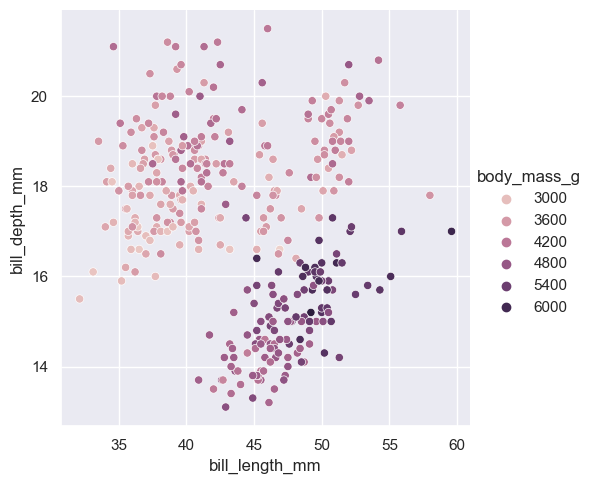

In [18]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)
plt.show()

When you're ready to share or publish your work, you'll probably want to polish the figure beyond what the defaults achieve. Seaborn allows for several levels of customization. It defines multiple built-in :doc:`themes </tutorial/aesthetics>` that apply to all figures, its functions have standardized parameters that can modify the semantic mappings for each plot, and additional keyword arguments are passed down to the underlying matplotlib artists, allowing even more control. Once you've created a plot, its properties can be modified through both the seaborn API and by dropping down to the matplotlib layer for fine-grained tweaking:

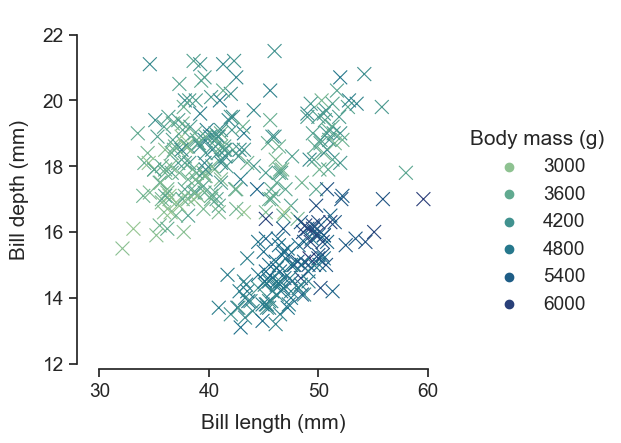

In [19]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)
plt.show()

## Relationship to matplotlib

Seaborn's integration with matplotlib allows you to use it across the many environments that matplotlib supports, including exploratory analysis in notebooks, real-time interaction in GUI applications, and archival output in a number of raster and vector formats.

While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib's concepts and API. One aspect of the learning curve for new users of seaborn will be knowing when dropping down to the matplotlib layer is necessary to achieve a particular customization. On the other hand, users coming from matplotlib will find that much of their knowledge transfers.

Matplotlib has a comprehensive and powerful API; just about any attribute of the figure can be changed to your liking. A combination of seaborn's high-level interface and matplotlib's deep customizability will allow you both to quickly explore your data and to create graphics that can be tailored into a `publication quality <https://github.com/wagnerlabpapers/Waskom_PNAS_2017>`_ final product.

## Next steps

You have a few options for where to go next. You might first want to learn how to :doc:`install seaborn </installing>`. Once that's done, you can browse the :doc:`example gallery </examples/index>` to get a broader sense for what kind of graphics seaborn can produce. Or you can read through the rest of the :doc:`user guide and tutorial </tutorial>` for a deeper discussion of the different tools and what they are designed to accomplish. If you have a specific plot in mind and want to know how to make it, you could check out the :doc:`API reference </api>`, which documents each function's parameters and shows many examples to illustrate usage.

In [20]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,matplotlib,bokeh,altair,plotly"))

Last updated: 2023-01-11T14:19:27.743229+01:00

Python implementation: CPython
Python version       : 3.8.15
IPython version      : 8.6.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 85 Stepping 7, GenuineIntel
CPU cores   : 40
Architecture: 64bit

watermark : 2.3.1
numpy     : 1.23.5
pandas    : 1.5.2
matplotlib: 3.6.2
bokeh     : 3.0.3
altair    : 4.2.0
plotly    : 5.11.0

